In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from scipy import stats
from sklearn.metrics import r2_score

In [5]:
wine = pd.read_csv('winequality-red.csv')

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
for i in wine.columns:
    print(wine[i].describe())

count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64
count    1599.000000
mean        0.527821
std         0.179060
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile acidity, dtype: float64
count    1599.000000
mean        0.270976
std         0.194801
min         0.000000
25%         0.090000
50%         0.260000
75%         0.420000
max         1.000000
Name: citric acid, dtype: float64
count    1599.000000
mean        2.538806
std         1.409928
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64
count    1599.000000
mean        0.087467
std         0.047065
min         0.012000
25%         0.070000
50%         0.079000
75%         0.090000
max         0.611000
Name: chloride

[]

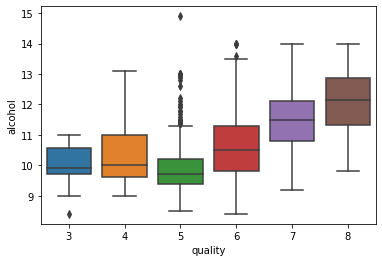

In [8]:
plt.figure()
sns.boxplot(x=wine['quality'], y=wine['alcohol'])
plt.plot()

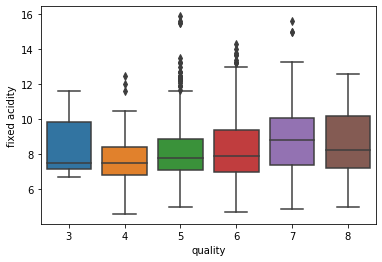

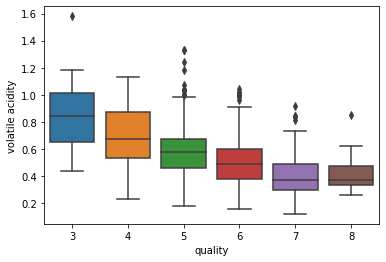

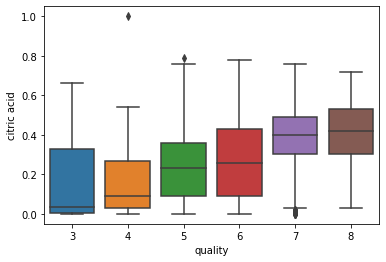

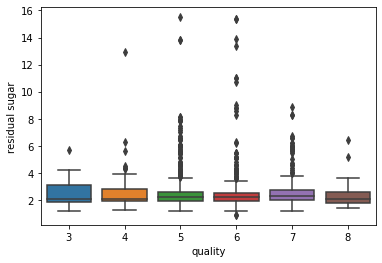

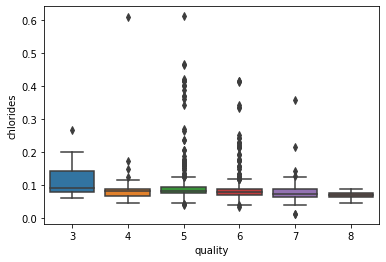

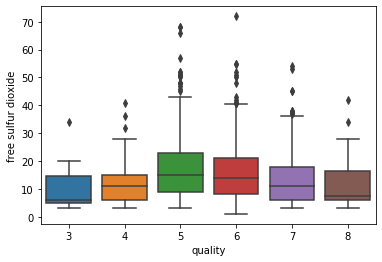

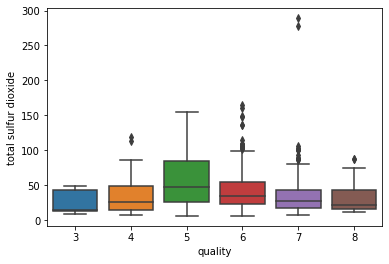

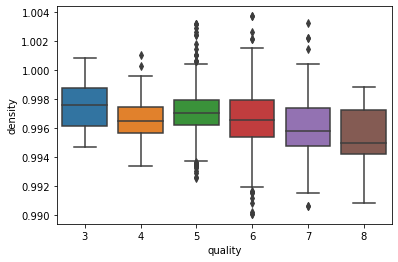

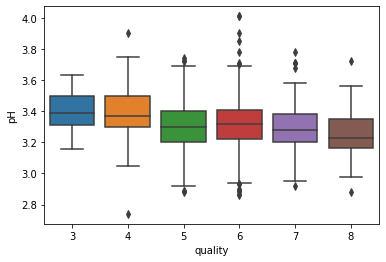

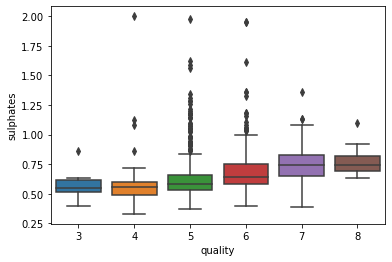

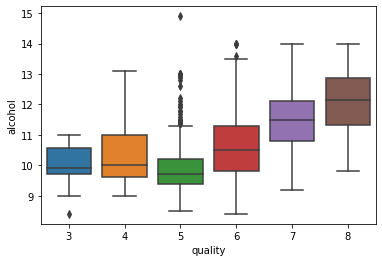

In [9]:
for i in wine.columns[:-1]:
    plt.figure()
    sns.boxplot(x=wine['quality'], y=wine[i])
    plt.plot()

[]

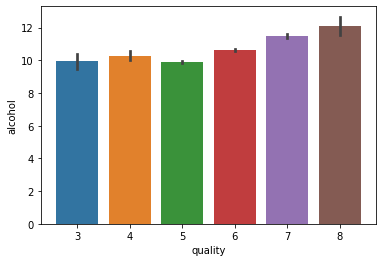

In [10]:
plt.figure()
sns.barplot(x=wine['quality'], y=wine['alcohol'])
plt.plot()

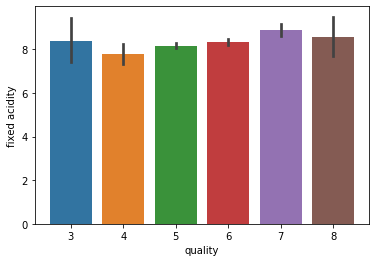

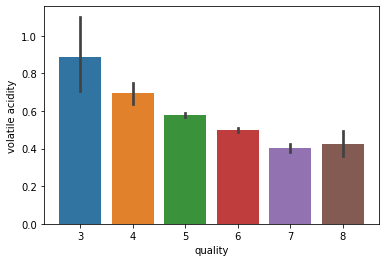

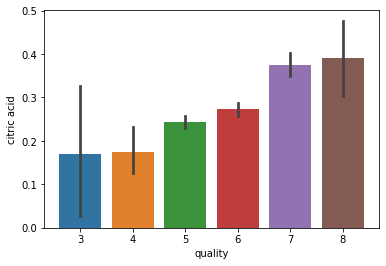

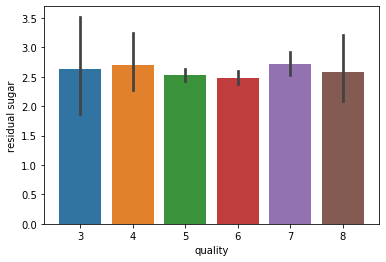

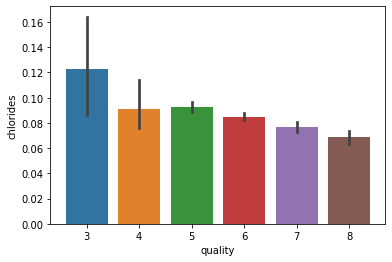

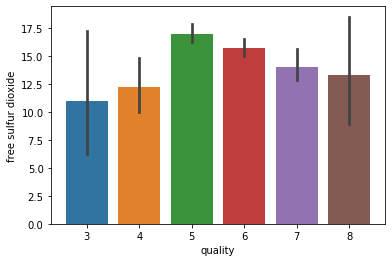

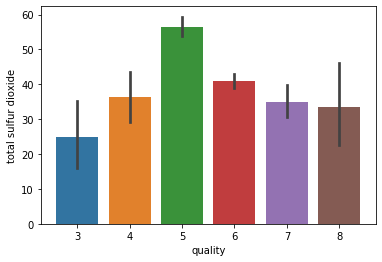

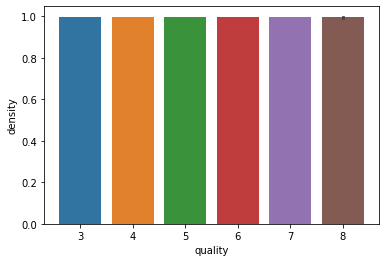

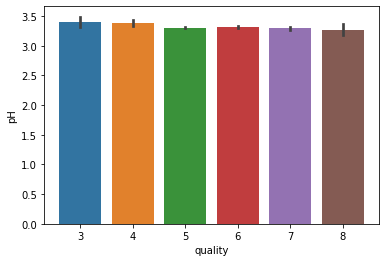

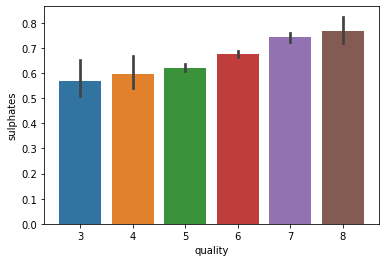

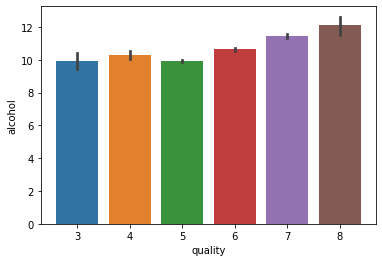

In [11]:
for i in wine.columns[:-1]:
    plt.figure()
    sns.barplot(x=wine['quality'], y=wine[i])
    plt.plot()

In [12]:
corr_matrix = np.corrcoef(wine.values.T)

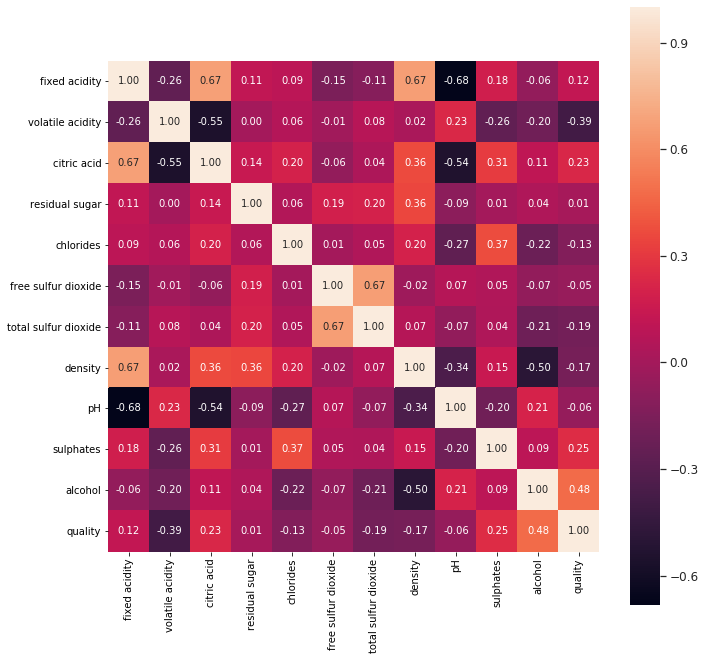

In [13]:
fig, ax = plt.subplots(figsize=(11,11))
sns.set(font_scale = 1.1)
sns.heatmap(data = corr_matrix,
           square = True,
           cbar = True,
           annot = True,
           fmt = '.2f',
           annot_kws = {'size':10},
           xticklabels = wine.columns,
           yticklabels = wine.columns)

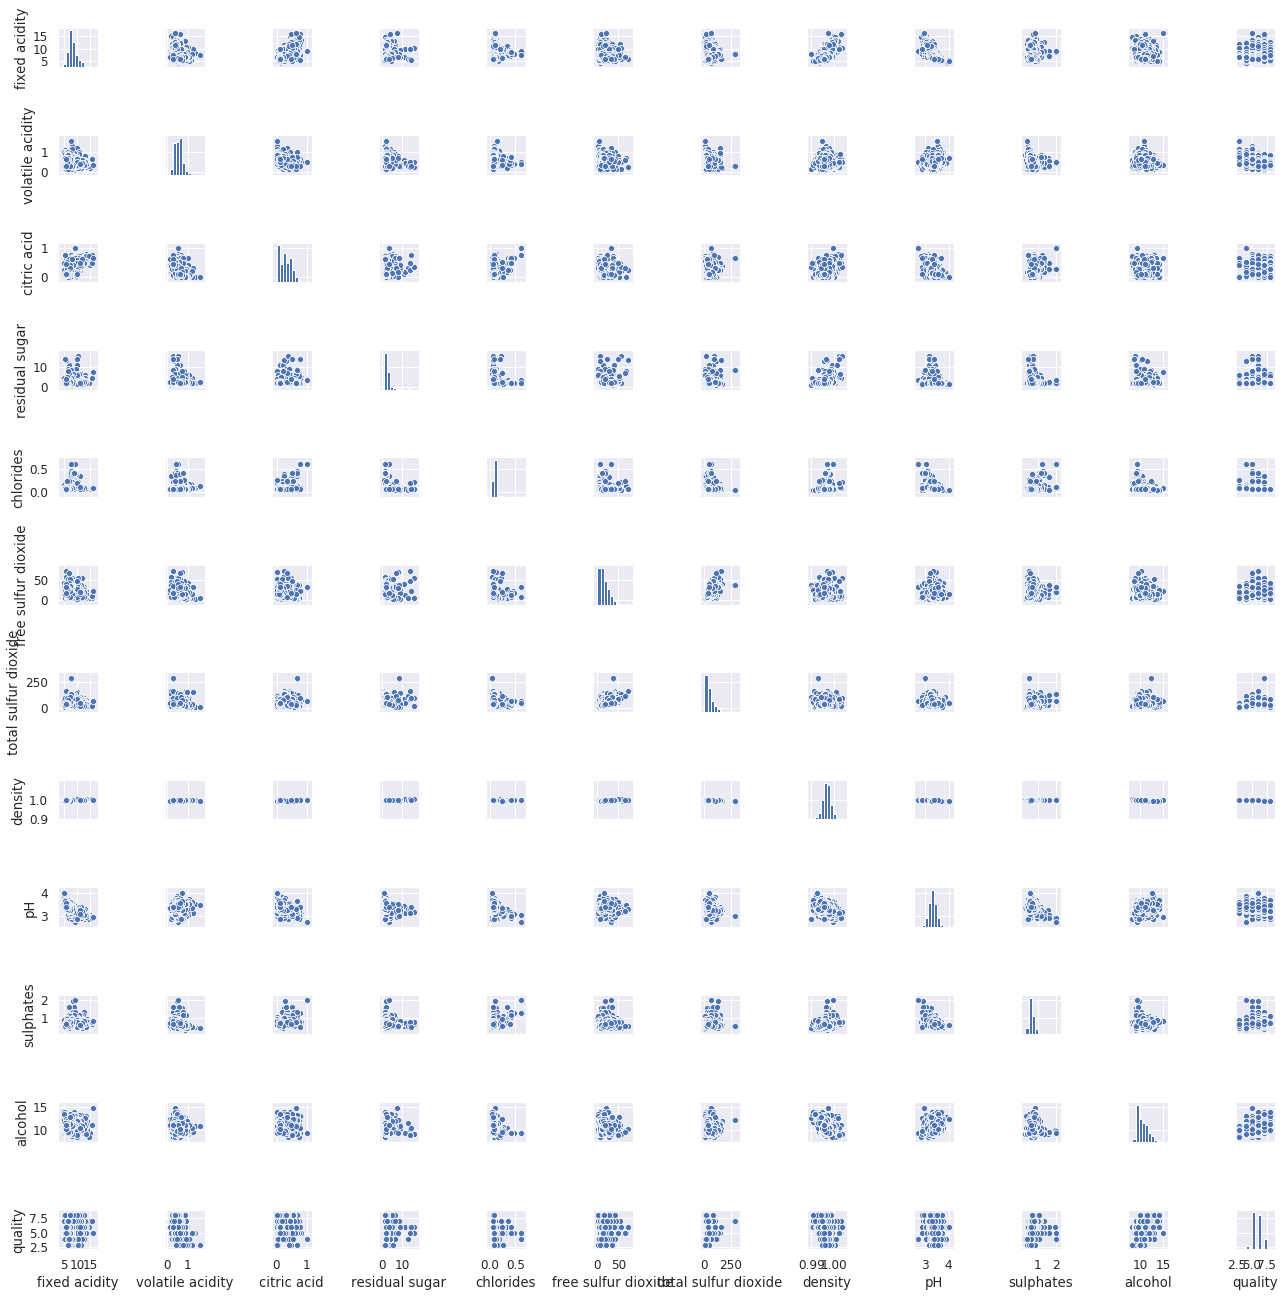

In [14]:
sns.pairplot(wine, height = 1.5)
columns = ['alcohol','volatile acidity', 'sulphates', 'citric acid','total sulfur dioxide', 'density', 'quality' ]



/home/m/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


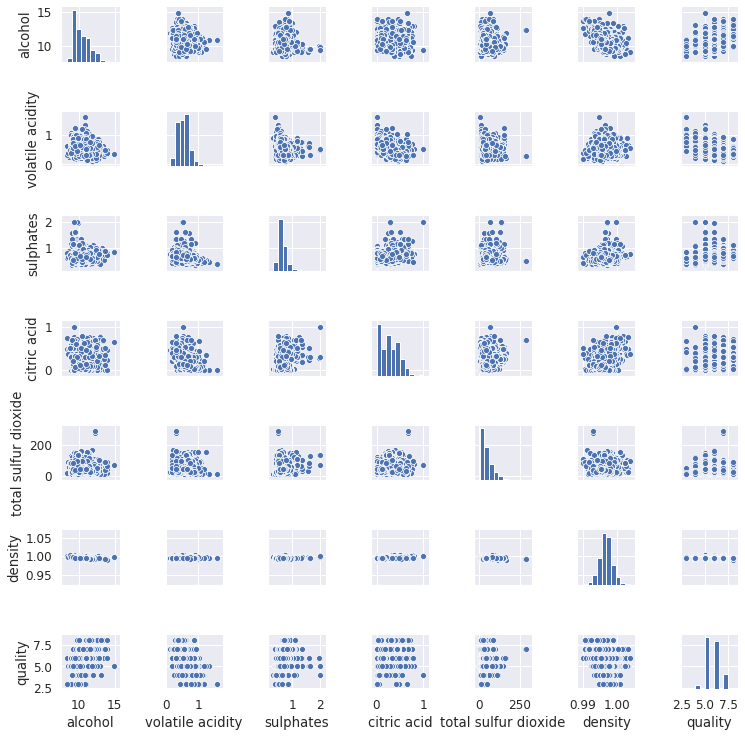

In [15]:
sns.pairplot(wine[columns], size = 1.5)

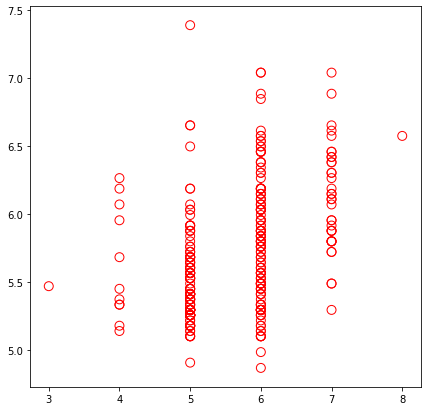

In [20]:
df=pd.read_csv('winequality-red.csv')
z = np.abs(stats.zscore(df))
threshold = 4 # 3 odchylenia standardowe
df = df[(z<threshold).all(axis=1)]
y=wine['quality'].values
x=wine.iloc[:,0:11].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

x = wine['alcohol'].values.reshape(-1,1)
y = wine['quality'].values

scaler = StandardScaler()
scaler.fit(x)
x_std = scaler.transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.2, random_state=42)

lrl = LinearRegression()
lrl.fit(x_train,y_train)

y_pred = lrl.predict(x_test)

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, s=80, facecolors='none', edgecolors = 'r')


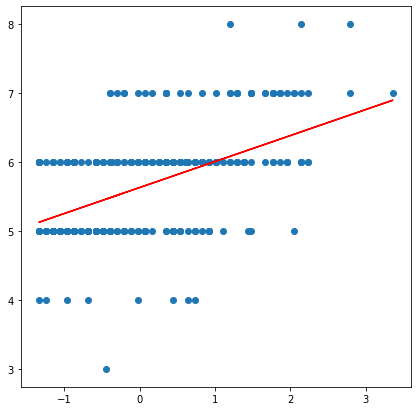

In [18]:
plt.figure(figsize=(7,7))
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color = 'red')

In [23]:
np.count_nonzero(np.rint(y_pred) == y_test) / len(y_test)  # ile razy uało nam sie poprawnie trafić
 # ponieważ liczby są tez po przecinku, tak zaokrągaląc mamy 

0.5375

In [24]:
round(np.mean(y_test))

6.0

In [26]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
           'chlorides', 'free sulfur dioxide','total sulfur dioxide', 
           'density', 'pH', 'sulphates', 'alcohol']

In [27]:
X = wine[columns]
y = wine['quality'].astype(float)

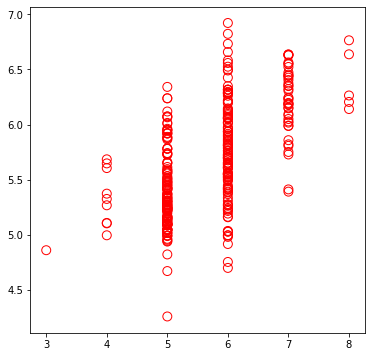

In [32]:
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, s=80, facecolors='none', edgecolors = 'r')



In [31]:
lr.score(X_test, y_test)

0.3259524216326612

In [33]:
good_counter = np.count_nonzero(y_test == np.rint(y_pred))

In [37]:
total_counter = len(y_test)

In [38]:
print(good_counter/total_counter)

0.59375


Wartości odstające

In [42]:
z = np.abs(stats.zscore(wine))
print(z)
threshold = 3 # 3 odchylenia standardowe

print(np.where(z > threshold))


[[0.52835961 0.96187667 1.39147228 ... 0.57920652 0.96024611 0.78782264]
 [0.29854743 1.96744245 1.39147228 ... 0.1289504  0.58477711 0.78782264]
 [0.29854743 1.29706527 1.18607043 ... 0.04808883 0.58477711 0.78782264]
 ...
 [1.1603431  0.09955388 0.72391627 ... 0.54204194 0.54162988 0.45084835]
 [1.39015528 0.65462046 0.77526673 ... 0.30598963 0.20930812 0.78782264]
 [1.33270223 1.21684919 1.02199944 ... 0.01092425 0.54162988 0.45084835]]
(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  

In [43]:
wine_o_z = wine[(z<threshold).all(axis=1)]
wine_o_z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [44]:
Q1 = wine.quantile(0.25)
Q3 = wine.quantile(0.75)
IQR = Q3 - Q1

In [50]:
((wine < (Q1 - 1.5*IQR)) | (wine > (Q3 +1.5*IQR)))
((wine < (Q1 - 1.5*IQR)) | (wine > (Q3 + 1.5*IQR))).iloc[14:18,4:7]

,chlorides,free sulfur dioxide,total sulfur dioxide
14,True,True,True
15,True,True,True
16,False,False,False
17,True,False,False


In [63]:
outlier_condition = ((wine < (Q1 - 1.5 *IQR)) | (wine > (Q3 +1.5*IQR)))
wine_o_iqr = wine[~outlier_condition.any(axis=1)]
wine_o_iqr 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
10,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.99590,3.28,0.54,9.2,5


In [64]:
print(wine['quality'].unique())
print(wine_o_z['quality'].unique())
print(wine_o_iqr['quality'].unique())


[5 6 7 4 8 3]
[5 6 7 4 8]
[5 6 7 4]


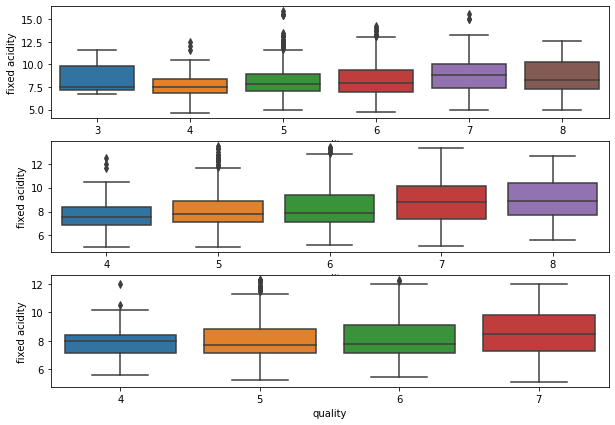

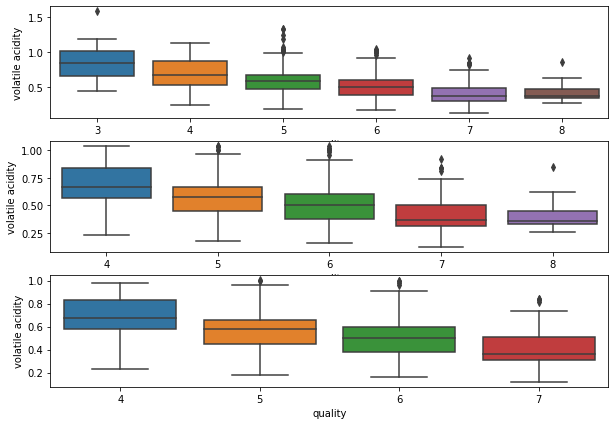

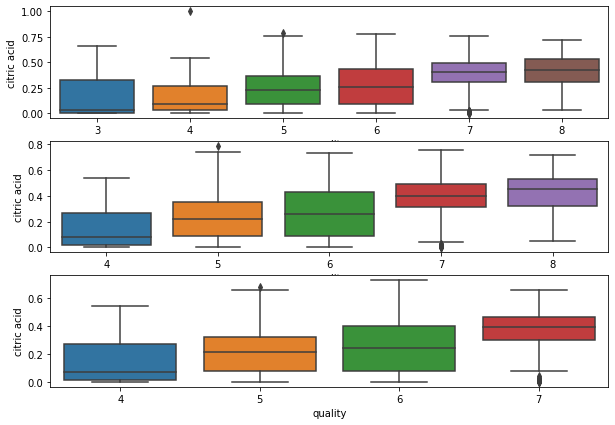

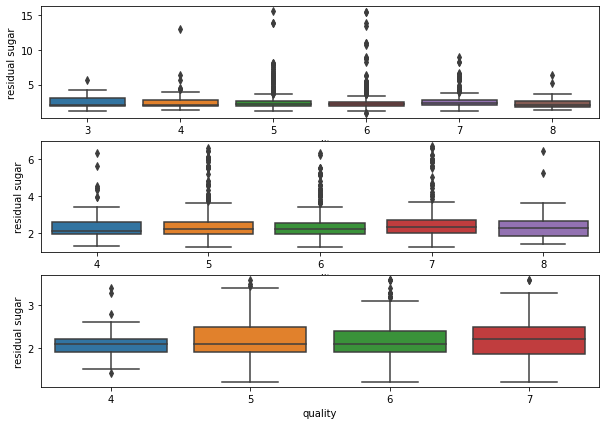

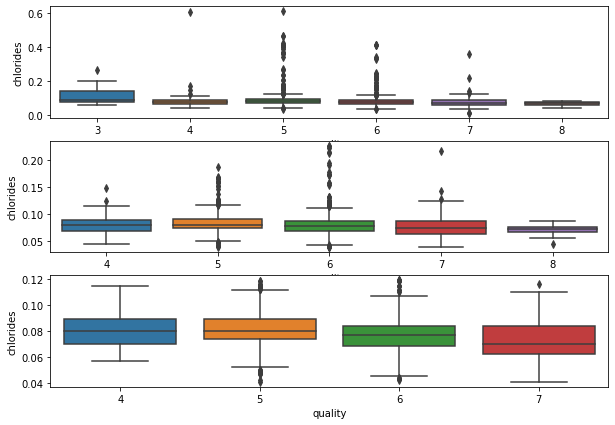

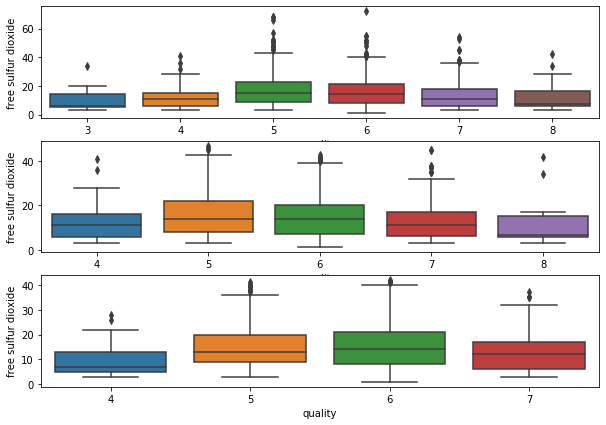

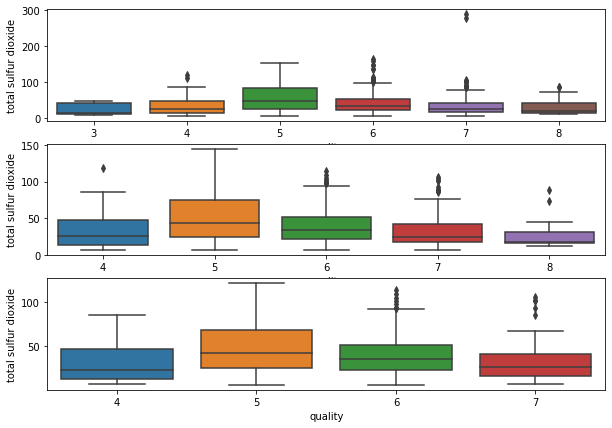

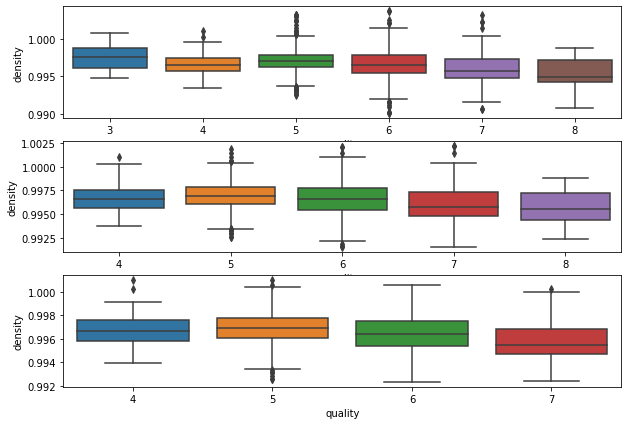

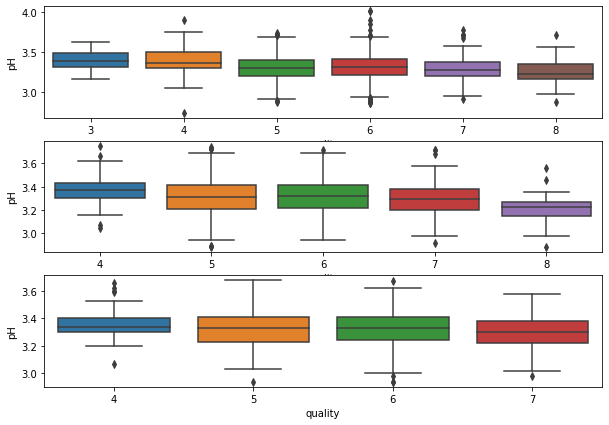

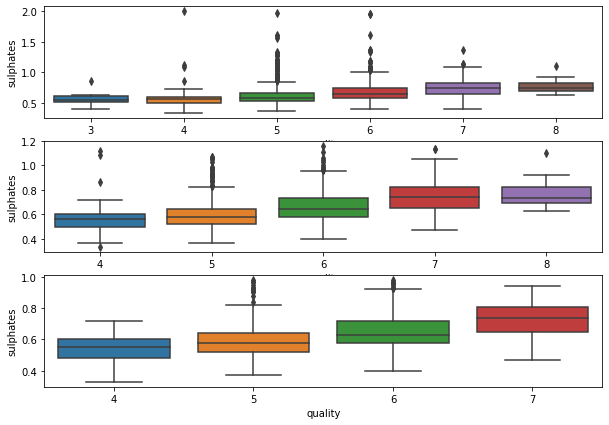

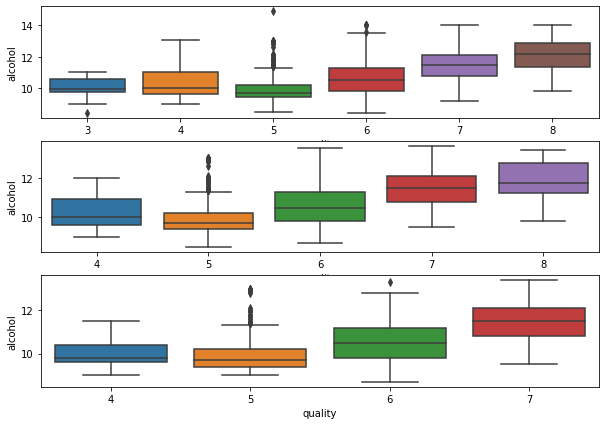

In [65]:
for i in wine.columns[:-1]:
    fig, axs = plt.subplots(3,1, figsize=(10,7))
    #fig.subtitle()
    sns.boxplot(x=wine['quality'], y=wine[i], ax=axs[0])
    sns.boxplot(x=wine_o_z['quality'], y=wine_o_z[i], ax=axs[1])
    sns.boxplot(x=wine_o_iqr['quality'], y=wine_o_iqr[i], ax=axs[2])
    plt.plot()

In [75]:
X = wine[columns]
y = wine['quality'].astype(float)
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)
good_counter = np.count_nonzero(y_test == np.rint(y_pred))
total_counter = len(y_test)
print(good_counter/total_counter)
print("R2 : ", r2_score(y_test, y_pred))

0.58125
R2 :  0.2992732270266485


In [76]:
Xo = wine_o_z[columns]
yoz = wine_o_z['quality'].astype(float)

scaler.fit(X)
Xoz = scaler.transform(Xo)

Xoz_train, Xoz_test, yoz_train, yoz_test = train_test_split(Xoz, yoz, test_size=0.2)

lr = LinearRegression()
lr.fit(Xoz_train,yoz_train)

yoz_pred = lr.predict(Xoz_test)
good_counter = np.count_nonzero(yoz_test == np.rint(yoz_pred))
total_counter = len(yoz_test)
print(good_counter/total_counter)
print("R2 : ", r2_score(yoz_test, yoz_pred))

0.5807560137457045
R2 :  0.30265392819044723


In [77]:
Xi = wine_o_iqr[columns]
yiq = wine_o_iqr['quality'].astype(float)
scaler.fit(X)
Xiq = scaler.transform(Xi)

Xiq_train, Xiq_test, yiq_train, yiq_test = train_test_split(Xiq, yiq, test_size=0.2)

lr = LinearRegression()
lr.fit(Xiq_train,yiq_train)

yiq_pred = lr.predict(Xiq_test)
good_counter = np.count_nonzero(yiq_test == np.rint(yiq_pred))
total_counter = len(yiq_test)
print(good_counter/total_counter)
print("R2 : ", r2_score(yiq_test, yiq_pred))

0.597457627118644
R2 :  0.37981013240781736
